,PC1,PC2
0,34.977216,-5.271435
1,-63.475362,45.204090
2,-75.820567,-31.145554
3,52.750144,-20.266767
4,-10.102158,5.291060


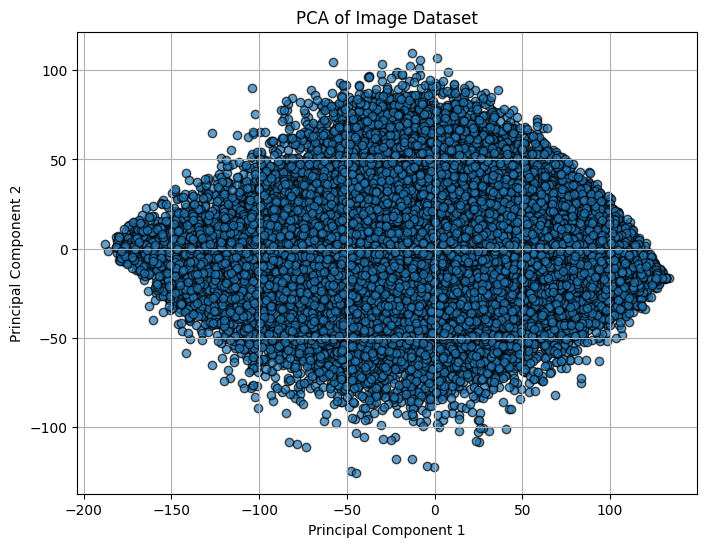

In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from glob import glob

# Load images from a dataset folder (change path accordingly)
image_folder = "F:/dataset/train_data"  # Update this with your dataset path
image_paths = glob(os.path.join(image_folder, "*.jpg"))  # Change extension if needed

# Function to load and preprocess images
def load_images(image_paths, img_size=(64, 64)):
    images = []
    for img_path in image_paths:
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        img = cv2.resize(img, img_size)  # Resize to uniform size
        images.append(img.flatten())  # Flatten the image
    return np.array(images)

# Load images as feature matrix
image_data = load_images(image_paths)

# Normalize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(image_data)

# Apply PCA
pca = PCA(n_components=2)  # Adjust components if needed
pca_result = pca.fit_transform(scaled_data)

# Create a PCA table
df_pca = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
display(df_pca.head())

# Plot PCA
plt.figure(figsize=(8, 6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], alpha=0.7, edgecolors='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Image Dataset")
plt.grid()
plt.show()